# Amazon Sales Analysis

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 

Loading Data

In [3]:
df = pd.read_csv('Amazon Sale Report.csv')
print(df.head())
print(df.columns)
# Inspecting the first few rows and column names

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

# Data Exploration

In [8]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [6]:
df.describe()

,index,Qty,Amount,ship-postal-code,New,PendingS
count,128976.000000,128976.000000,121176.000000,128941.000000,0.0,0.0
mean,64486.130427,0.904401,648.562176,463945.677744,NaN,NaN
std,37232.897832,0.313368,281.185041,191458.488954,NaN,NaN
min,0.000000,0.000000,0.000000,110001.000000,NaN,NaN
25%,32242.750000,1.000000,449.000000,382421.000000,NaN,NaN
50%,64486.500000,1.000000,605.000000,500033.000000,NaN,NaN
75%,96730.250000,1.000000,788.000000,600024.000000,NaN,NaN
max,128974.000000,15.000000,5584.000000,989898.000000,NaN,NaN


# Data Cleaning
- Convert Date to datetime: Necessary for sales trends.
- Handle Missing Data: Columns like fulfilled-by, PendingS, and possibly postal codes.
- Categorical columns: Like Status, Fulfilment, Category are cleaned.

In [13]:
# Converting Date to datetime, allowing pandas to infer the format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check if any date values were converted to NaT (i.e., failed conversions)
print(df['Date'].isna().sum())  # To check how many invalid dates were found

0


C:\Users\vs756\AppData\Local\Temp\ipykernel_11100\4259897396.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [14]:
df = df.dropna(subset=['Date'])
# Drop rows where the date conversion failed (NaT)

In [15]:
# Converting Date to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

In [16]:
# Drop rows with missing values in critical columns (like Amount, Status)
df = df.dropna(subset=['Amount', 'Status'])

In [17]:
# Fill NaNs in non-critical columns with a placeholder or mode
df['fulfilled-by'].fillna('Unknown', inplace=True)
df['PendingS'].fillna('Not Pending', inplace=True)

C:\Users\vs756\AppData\Local\Temp\ipykernel_11100\540522156.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fulfilled-by'].fillna('Unknown', inplace=True)
C:\Users\vs756\AppData\Local\Temp\ipykernel_11100\540522156.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

# Sales Overview
- We can quickly get an overview of sales trends over time using the Amount and Date columns.

<Axes: title={'center': 'Sales Trend Over Time'}, xlabel='Month'>

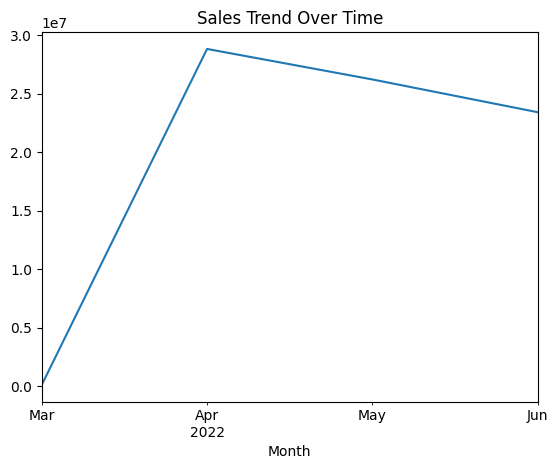

In [19]:
# Group sales by month for trend analysis
df['Month'] = df['Date'].dt.to_period('M')

# Calculate total sales per month
monthly_sales = df.groupby('Month')['Amount'].sum()

# Quick visualization
monthly_sales.plot(kind='line', title='Sales Trend Over Time')


# Product Analysis
- Analyze the distribution of product categories, sizes, and quantities.

<Axes: title={'center': 'Top 10 Products by Sales'}, xlabel='Category,Size'>

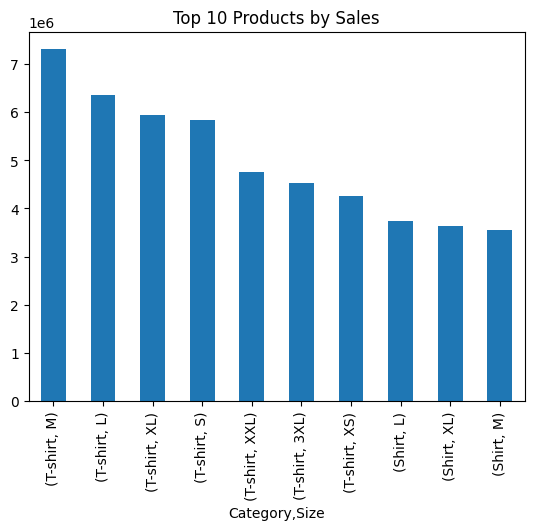

In [20]:
# Group by Category and Size to see which products are selling the most
product_sales = df.groupby(['Category', 'Size'])['Amount'].sum()

# Sort to find top-selling categories and sizes
top_products = product_sales.sort_values(ascending=False).head(10)

# Bar plot for product category sales
top_products.plot(kind='bar', title='Top 10 Products by Sales')


# Fulfillment Method Analysis
- This analysis focuses on the effectiveness of fulfillment methods.

<Axes: title={'center': 'Fulfilment Methods by Order Status'}, xlabel='Fulfilment'>

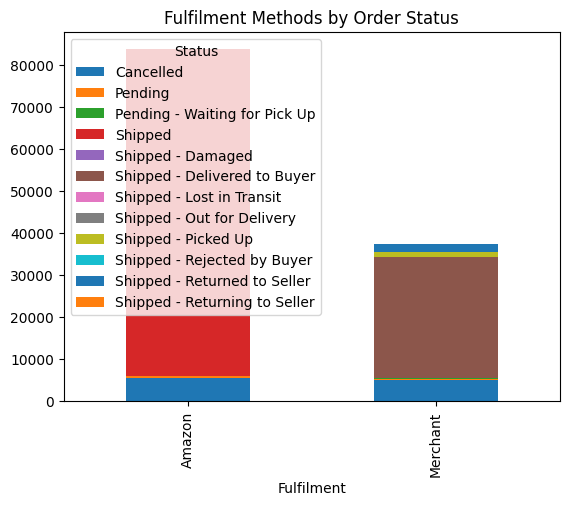

In [21]:
# Group by Fulfilment and Status to check effectiveness
fulfillment_status = df.groupby(['Fulfilment', 'Status'])['Order ID'].count().unstack()

# Visualize fulfillment status
fulfillment_status.plot(kind='bar', stacked=True, title='Fulfilment Methods by Order Status')

# Geographical Analysis
- Explore geographical sales distribution by ship-state and ship-city.

<Axes: title={'center': 'Sales by State'}, xlabel='ship-state'>

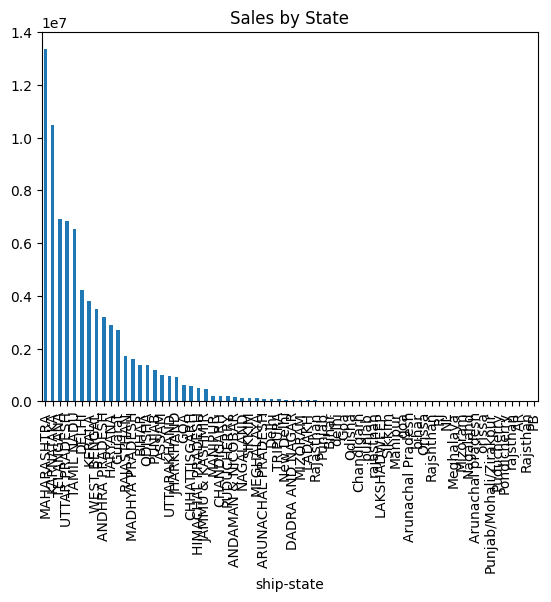

In [25]:
# Group by state and calculate total sales
geo_sales_state = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False)

# Group by city and calculate total sales
geo_sales_city = df.groupby('ship-city')['Amount'].sum().sort_values(ascending=False)

# Plot sales distribution by state
geo_sales_state.plot(kind='bar', title='Sales by State')


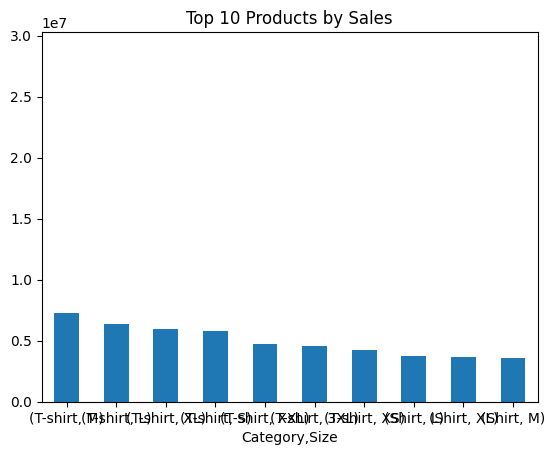

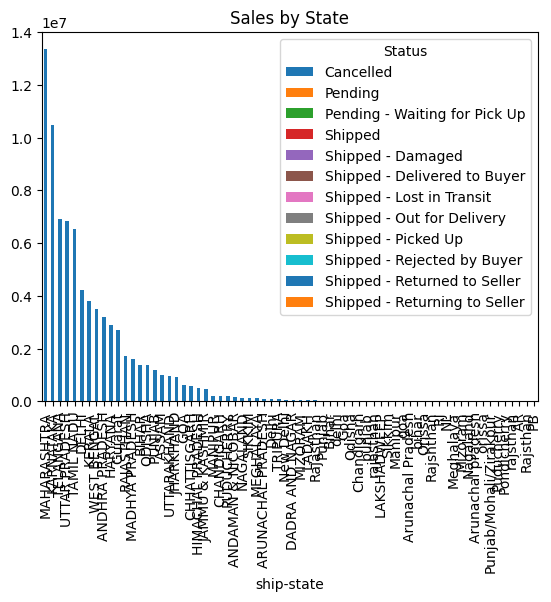

In [26]:
# Save plots to files for presentation
monthly_sales.plot(kind='line', title='Sales Trend Over Time').figure.savefig('sales_trend.png')
top_products.plot(kind='bar', title='Top 10 Products by Sales').figure.savefig('top_products.png')
fulfillment_status.plot(kind='bar', stacked=True, title='Fulfilment Methods by Order Status').figure.savefig('fulfillment.png')
geo_sales_state.plot(kind='bar', title='Sales by State').figure.savefig('sales_by_state.png')


# Thankyou! Team InnoByte for the opportunity. 

- I am still learning. Somewhere in the graph, I ran out of ideas on how to shorten names and display them better. I would be happy if you revert its solution. 